In [1]:
import re, nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from wordcloud import WordCloud
from PIL import Image

In [4]:
with open("Quo_vadis.txt", encoding="utf8") as myfile:
    data = " ".join(line.rstrip() for line in myfile)

In [5]:
print(data[:200])

Henryk Sienkiewicz  Quo vadis  ISBN 978-83-288-2832-2     Rozdział pierwszy  Petroniusz obudził się zaledwie koło południa i jak zwykle, zmęczony bardzo. Poprzedniego dnia był na uczcie u Nerona, któr


In [17]:
with open("stopwords_pl.txt", encoding="utf8") as myfile:
    stop_text = " ".join(line.rstrip() for line in myfile)

stopWords = set(stop_text.split(" "))


In [47]:
text = re.sub(r"[^\w]+", " ", data).split(" ")

chapters = [[]]

i = 0

for word in text:
    if word == "Rozdział":
        chapters.append([])
        i += 1
    
    if word not in stopWords and len(word) > 1 and word[0] != "'":
        chapters[i].append(word.lower())
    
print(chapters[0])
chapters = chapters[1:]
    

['henryk', 'sienkiewicz', 'quo', 'vadis', 'isbn', '978', '83', '288', '2832']


In [48]:
count_all_chapters = {}
for word in [word for chapter in chapters for word in chapter]:
    count_all_chapters.setdefault(word, 0)
    count_all_chapters[word] = count_all_chapters[word] + 1

In [49]:
chapters_tfs = []
chapters_word_counts = []
book_word_counts = {}

for chapter in chapters[1:]:
    chapter_count = {}
    total = len(chapter)
    
    for word in chapter:
        chapter_count.setdefault(word, 0)
        chapter_count[word] = chapter_count[word] + 1
        
        book_word_counts.setdefault(word, 0)
        book_word_counts[word] = book_word_counts[word] + 1
        
    chapters_word_counts.append(chapter_count)     
    chapters_tfs.append({word:(count/total) for (word, count) in chapter_count.items()})


In [50]:
chapters_tf_idfs = []

for chapter_tf in chapters_tfs:
    chapter_tf_idf = {}
    for word, tf in chapter_tf.items():
        docs_with_term = np.sum([1 for chap in chapters_tfs if word in chap.keys()])
        chapter_tf_idf.setdefault(word, tf*np.log(len(chapters_tfs)/docs_with_term))
    
    chapters_tf_idfs.append(chapter_tf_idf)

In [51]:
print(sorted([x for x in chapters_tf_idfs[13].items()], key=lambda x: x[1], reverse=True))

[('poznam', 0.014710146655365911), ('umieć', 0.012333642036303242), ('chilon', 0.010408256358230467), ('cudnie', 0.00980676443691061), ('wyścig', 0.00980676443691061), ('korbulon', 0.00980676443691061), ('donieś', 0.00980676443691061), ('kochać', 0.008673546965192055), ('tyrydata', 0.008222428024202163), ('żegnaj', 0.006638091611493716), ('baiae', 0.006128049208489808), ('żydzi', 0.006128049208489808), ('czczą', 0.006128049208489808), ('chodził', 0.006128049208489808), ('przebraniu', 0.0057113142215321966), ('pójdziemy', 0.0057113142215321966), ('niczym', 0.005204128179115234), ('są', 0.0050537551987852695), ('każdego', 0.0050537551987852695), ('piętnasty', 0.004903382218455305), ('posłańca', 0.004903382218455305), ('zwłoki', 0.004903382218455305), ('odpiszesz', 0.004903382218455305), ('śladzie', 0.004903382218455305), ('pełnego', 0.004903382218455305), ('alboś', 0.004903382218455305), ('objęciach', 0.004903382218455305), ('ukoił', 0.004903382218455305), ('powieje', 0.00490338221845530

In [69]:
import os

def save_word_cloud(chapter, number_of_chapter=0, name=""): 
    
    if 'results' not in os.listdir():
        os.mkdir('results')
    
    path = os.getcwd() + '\\results'
    counts_list = [(word, c) for word, c in zip(chapter.keys(), chapter.values())]
    counts_list.sort(key = lambda x: x[1], reverse=True)
    wc_dict = {w: c for w,c in counts_list[:64]}
    mask = np.array(Image.open("storm.png"))
    cloud = WordCloud(background_color="white", mask=mask, max_words=100)
    cloud.generate_from_frequencies(wc_dict)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    if name == "":
        cloud.to_file("{}\\chapter_{}_cloud.png".format(path, number_of_chapter))
    else:
        cloud.to_file("{}\\{}.png".format(path, name))  

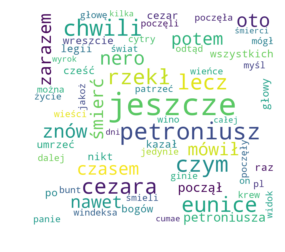

In [67]:
for chap_n, chapter in enumerate(chapters_word_counts):
    save_word_cloud(chapter, chap_n+1)

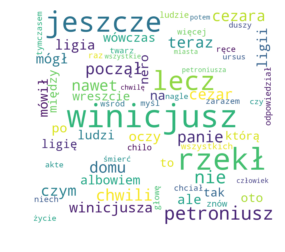

In [70]:
save_word_cloud(book_word_counts, name='whole_book')